In [26]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El dataset que presentas parece provenir de una plataforma de ventas en línea, posiblemente Mercado Libre, y contiene información sobre productos listados para la venta. A continuación, se explica lo que podría significar cada columna:

seller_address: Información sobre la dirección del vendedor, que puede incluir comentarios, coordenadas de longitud y latitud, y un identificador único.
warranty: Información sobre la garantía del producto, si es que existe.
sub_status: Lista de estados secundarios del artículo, posiblemente relacionada con la disponibilidad o condiciones de la venta.
condition: Condición del artículo, como nuevo ("new") o usado ("used").
seller_contact: Información de contacto del vendedor, si está disponible.
deal_ids: Identificadores de ofertas asociadas con el producto.
base_price: Precio base del producto antes de aplicar descuentos o tarifas adicionales.
shipping: Información sobre el envío, como métodos disponibles, si se permite la recogida local y etiquetas relacionadas.
non_mercado_pago_payment_methods: Métodos de pago disponibles que no pertenecen a Mercado Pago, el sistema de pago de la plataforma.
seller_id: Identificador único del vendedor en la plataforma.
variations: Variaciones del producto, como tamaño, color o especificaciones adicionales.
location: Información adicional sobre la ubicación del vendedor, posiblemente detalles específicos más allá de la dirección básica.
site_id: Identificador del sitio o país en el que se realiza la venta, por ejemplo, "MLA" para Argentina.
listing_type_id: Tipo de listado, como estándar o premium, que podría afectar la visibilidad del producto en la plataforma.
price: Precio actual del producto.
attributes: Lista de atributos del producto, como características técnicas o detalles específicos.
buying_mode: Modo de compra, por ejemplo, "buy_it_now" indica una compra directa.
tags: Etiquetas adicionales que pueden describir el estado del producto o características de la venta.
listing_source: Fuente de la publicación, indicando el origen del listado.
parent_item_id: Identificador del artículo padre, en caso de que el producto forme parte de un paquete o conjunto.
coverage_areas: Áreas donde se puede entregar o vender el producto.
category_id: Identificador de la categoría del producto en la plataforma.
descriptions: Descripciones del producto, que pueden incluir enlaces o referencias a contenido adicional.
last_updated: Fecha en la que se actualizó por última vez la información del producto.
international_delivery_mode: Indica si el producto se puede enviar a nivel internacional y, en caso afirmativo, el modo de envío.
pictures: Lista de imágenes del producto, que incluyen tamaños y URLs de las imágenes.
id: Identificador único del producto en la plataforma.
official_store_id: Identificador de la tienda oficial, si el vendedor es una tienda oficial en la plataforma.
differential_pricing: Información sobre precios diferenciales, que podría estar relacionada con promociones o descuentos para ciertos compradores.
accepts_mercadopago: Indica si el vendedor acepta Mercado Pago como método de pago.
original_price: Precio original del producto antes de descuentos.
currency_id: Código de la moneda en la que se expresa el precio, por ejemplo, "ARS" para pesos argentinos.
thumbnail: URL de una imagen en miniatura del producto.
title: Título o nombre del producto.
automatic_relist: Indica si el artículo se vuelve a publicar automáticamente cuando la venta se completa o expira.
date_created: Fecha en que se creó el listado.
secure_thumbnail: URL segura (https) de la imagen en miniatura del producto.
stop_time: Fecha en la que el artículo dejará de estar disponible para la venta.
status: Estado del artículo, como "active" para disponible o "paused" para pausado.
video_id: Identificador de un video asociado con el producto, si es que tiene alguno.
catalog_product_id: Identificador del producto en el catálogo, en caso de pertenecer a un catálogo de productos estandarizado.
subtitle: Subtítulo adicional que puede complementar la información del título.
initial_quantity: Cantidad inicial de unidades disponibles para la venta.
start_time: Fecha y hora en que se comenzó a listar el producto.
permalink: Enlace permanente al listado del producto en la plataforma.
geolocation: Coordenadas de latitud y longitud del lugar de origen del artículo.
sold_quantity: Cantidad de unidades vendidas.
available_quantity: Cantidad de unidades disponibles para la venta.

In [2]:
raw_data = pd.read_json("../datos/MLA_100k.jsonlines", lines=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [3]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
base_price,100000.0,5.252423e+04,8.623127e+06,0.84,90.0,250.0,8.000000e+02,2.222222e+09
seller_id,100000.0,8.425269e+07,5.497257e+07,1304.00,39535905.5,76310627.0,1.325659e+08,1.946906e+08
price,100000.0,5.252433e+04,8.623127e+06,0.84,90.0,250.0,8.000000e+02,2.222222e+09
official_store_id,818.0,2.064438e+02,1.282530e+02,1.00,84.0,216.0,3.127500e+02,4.460000e+02
differential_pricing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_price,143.0,1.593342e+03,2.245798e+03,120.00,449.0,858.0,1.500000e+03,1.399900e+04
catalog_product_id,11.0,3.727643e+06,1.884698e+06,94404.00,3050701.5,5093232.0,5.103216e+06,5.434513e+06
subtitle,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
initial_quantity,100000.0,3.509337e+01,4.210762e+02,1.00,1.0,1.0,2.000000e+00,9.999000e+03
sold_quantity,100000.0,2.396990e+00,4.268508e+01,0.00,0.0,0.0,0.000000e+00,8.676000e+03


In [4]:
pd.set_option('display.max_columns', None)


In [5]:
raw_data.head(3)

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,location,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,[],{},MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA568261029,[],MLA126406,[{'id': 'MLA578052519-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA578052519,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA435206787...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04 20:42:53+00:00,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,[],{},MLA,silver,2650.0,[],buy_it_now,[],,MLA561574487,[],MLA10267,[{'id': 'MLA581565358-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA581565358,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA20245018...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25 18:08:30+00:00,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,[],{},MLA,bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],,MLA568881256,[],MLA1227,[{'id': 'MLA578780872-916478256'}],2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA578780872,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA20223367...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-08 23:57:07+00:00,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1


In [6]:
json_columns = ['seller_address', 'shipping', 'geolocation']

for col in json_columns:
    try:
        expanded_cols = pd.json_normalize(raw_data[col])

        expanded_cols = expanded_cols.add_prefix(f'{col}_')

        raw_data = pd.concat([raw_data, expanded_cols], axis=1)

        raw_data.drop(columns=[col], inplace=True)
    except Exception as e:
        print(f"Error {col}: {e}")

print(raw_data)

                                                warranty sub_status condition  \
0                                                   None         []       new   
1                                     NUESTRA REPUTACION         []      used   
2                                                   None         []      used   
3                                                   None         []       new   
4                                         MI REPUTACION.         []      used   
...                                                  ...        ...       ...   
99995                                               None         []      used   
99996                                               None         []       new   
99997                                               None         []      used   
99998  Buen estado, se verifica al entregar. la total...         []      used   
99999                                               None         []      used   

      seller_contact deal_i

In [7]:
raw_data = raw_data.drop(columns=raw_data.filter(like='id').columns)


In [8]:
print(raw_data.isna().sum())

warranty                                             60896
sub_status                                               0
condition                                                0
seller_contact                                       97781
base_price                                               0
non_mercado_pago_payment_methods                         0
variations                                               0
location                                                 0
price                                                    0
attributes                                               0
buying_mode                                              0
tags                                                     0
listing_source                                           0
coverage_areas                                           0
descriptions                                             0
last_updated                                             0
international_delivery_mode                             

In [9]:

def calcular_pixeles(pictures):
    try:
        size = pictures[0].get('size') if pictures and isinstance(pictures, list) else None
        if size:
            width, height = map(int, size.split('x'))
            return width * height
        else:
            return None
    except Exception as e:
        print(f"Error al calcular píxeles: {e}")
        return None
    

def calcular_pixeles_max(pictures):
    try:
        size = pictures[0].get('max_size') if pictures and isinstance(pictures, list) else None
        if size:
            width, height = map(int, size.split('x'))
            return width * height
        else:
            return None
    except Exception as e:
        print(f"Error al calcular píxeles: {e}")
        return None


raw_data['pixeles'] = raw_data['pictures'].apply(calcular_pixeles)
raw_data['pixeles_max'] = raw_data['pictures'].apply(calcular_pixeles_max)

raw_data.drop(columns='pictures', inplace=True)
print(raw_data[['pixeles', 'pixeles_max']])


        pixeles  pixeles_max
0      187500.0    1080000.0
1      166666.0     605787.0
2      187500.0    1080000.0
3      186543.0     186543.0
4      187500.0     307200.0
...         ...          ...
99995  187500.0    1080000.0
99996  187500.0    1080000.0
99997  187500.0    1080000.0
99998  193500.0    1117200.0
99999  187500.0    1080000.0

[100000 rows x 2 columns]


In [10]:
def Count_methods(payment_methods):
    if isinstance(payment_methods, list):
        return len(payment_methods)
    else:
        return 0

raw_data['non_mercado_pago_payment_methods'] = raw_data['non_mercado_pago_payment_methods'].apply(Count_methods)

print(raw_data[['non_mercado_pago_payment_methods']])

       non_mercado_pago_payment_methods
0                                     3
1                                     2
2                                     3
3                                     3
4                                     3
...                                 ...
99995                                 2
99996                                 2
99997                                 0
99998                                 2
99999                                 2

[100000 rows x 1 columns]


In [11]:
raw_data['stop_time'] = pd.to_datetime(raw_data['stop_time'])
raw_data['start_time'] = pd.to_datetime(raw_data['start_time'])
raw_data['last_updated'] = pd.to_datetime(raw_data['last_updated'])

# Calculate the number of active days between stop_time and start_time
raw_data['days_active'] = (raw_data['stop_time'] - raw_data['start_time']).dt.days

# Calculate the number of days between last_updated and start_time
raw_data['days_since_last_update'] = (raw_data['last_updated'] - raw_data['start_time']).dt.days

# Drop the original columns
raw_data.drop(columns=['stop_time', 'start_time', 'last_updated'], inplace=True)
print(raw_data[['days_active', 'days_since_last_update']])



       days_active  days_since_last_update
0               60                       0
1               60                       0
2               60                       0
3               66                       6
4               60                       3
...            ...                     ...
99995           60                       0
99996           60                       0
99997           60                       0
99998           60                       0
99999           60                       0

[100000 rows x 2 columns]


In [12]:
raw_data['warranty'] = raw_data['warranty'].notna()

print(raw_data[['warranty']])


       warranty
0         False
1          True
2         False
3         False
4          True
...         ...
99995     False
99996     False
99997     False
99998      True
99999     False

[100000 rows x 1 columns]


In [13]:
raw_data['seller_contact'] = raw_data['seller_contact'].notna()

# Display the resulting dataframe
print(raw_data[['seller_contact']])

       seller_contact
0               False
1               False
2               False
3               False
4               False
...               ...
99995           False
99996           False
99997           False
99998           False
99999           False

[100000 rows x 1 columns]


In [14]:
raw_data['original_price'] = raw_data['original_price'].fillna(raw_data['price'])

In [15]:
columns_to_drop = ['geolocation_longitude','geolocation_latitude','permalink','seller_address_address_line','secure_thumbnail','date_created','thumbnail','title','shipping_tags','shipping_methods','seller_address_state.name','seller_address_zip_code','seller_address_comment','descriptions','coverage_areas','listing_source','sub_status','location','attributes','international_delivery_mode','shipping_free_methods', 'differential_pricing','shipping_dimensions','seller_address_search_location.neighborhood.name','seller_address_country.name', 'seller_address_search_location.state.name', 'seller_address_search_location.city.name','seller_address_city.name','differential_pricing','subtitle']
raw_data.drop(columns=columns_to_drop, inplace=True)

In [16]:
raw_data['tags'] = raw_data['tags'].apply(lambda x: True if isinstance(x, list) and len(x) > 0 else False)


In [17]:
raw_data['status'] = raw_data['status'].apply(lambda x: 'active' if x == 'active' else 'no_active')

In [18]:
raw_data['variations'] = raw_data['variations'].apply(lambda x: True if isinstance(x, list) and len(x) > 0 else False)


In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   warranty                          100000 non-null  bool   
 1   condition                         100000 non-null  object 
 2   seller_contact                    100000 non-null  bool   
 3   base_price                        100000 non-null  float64
 4   non_mercado_pago_payment_methods  100000 non-null  int64  
 5   variations                        100000 non-null  bool   
 6   price                             100000 non-null  float64
 7   buying_mode                       100000 non-null  object 
 8   tags                              100000 non-null  bool   
 9   accepts_mercadopago               100000 non-null  bool   
 10  original_price                    100000 non-null  float64
 11  automatic_relist                  100000 non-null  bo

In [20]:
raw_data.head()

,warranty,condition,seller_contact,base_price,non_mercado_pago_payment_methods,variations,price,buying_mode,tags,accepts_mercadopago,original_price,automatic_relist,status,initial_quantity,sold_quantity,available_quantity,seller_address_longitude,seller_address_latitude,shipping_local_pick_up,shipping_free_shipping,shipping_mode,pixeles,pixeles_max,days_active,days_since_last_update
0,False,new,False,80.0,3,False,80.0,buy_it_now,True,True,80.0,False,active,1,0,1,-58.398671,-34.62807,True,False,not_specified,187500.0,1080000.0,60,0
1,True,used,False,2650.0,2,False,2650.0,buy_it_now,False,True,2650.0,False,active,1,0,1,-58.505917,-34.593552,True,False,me2,166666.0,605787.0,60,0
2,False,used,False,60.0,3,False,60.0,buy_it_now,True,True,60.0,False,active,1,0,1,-58.414395,-34.623391,True,False,me2,187500.0,1080000.0,60,0
3,False,new,False,580.0,3,False,580.0,buy_it_now,False,True,580.0,False,active,1,0,1,-58.492921,-34.628189,True,False,me2,186543.0,186543.0,66,6
4,True,used,False,30.0,3,False,30.0,buy_it_now,True,True,30.0,False,active,1,0,1,-58.549504,-34.634655,True,False,not_specified,187500.0,307200.0,60,3


In [21]:
summary = pd.DataFrame({
    'dtypes': raw_data.dtypes,
    'null count': raw_data.isnull().sum(),
    'unique values': raw_data.nunique()
})
summary

,dtypes,null count,unique values
warranty,bool,0,2
condition,object,0,2
seller_contact,bool,0,2
base_price,float64,0,10330
non_mercado_pago_payment_methods,int64,0,13
variations,bool,0,2
price,float64,0,10331
buying_mode,object,0,3
tags,bool,0,2
accepts_mercadopago,bool,0,2


In [22]:
raw_data.dropna(subset=['pixeles', 'pixeles_max'], inplace=True)


In [23]:
# Convert the columns to numeric, coercing errors to NaN
raw_data['seller_address_latitude'] = pd.to_numeric(raw_data['seller_address_latitude'], errors='coerce')
raw_data['seller_address_longitude'] = pd.to_numeric(raw_data['seller_address_longitude'], errors='coerce')

# Fill NaN values with the mean of the respective columns
raw_data['seller_address_latitude'] = raw_data['seller_address_latitude'].fillna(raw_data['seller_address_latitude'].mean())
raw_data['seller_address_longitude'] = raw_data['seller_address_longitude'].fillna(raw_data['seller_address_longitude'].mean())


In [32]:
print(raw_data.shape)
raw_data.drop_duplicates(inplace=True)
print(raw_data.shape)

(99161, 25)
(93484, 25)


In [33]:
raw_data.to_csv("../datos/cleandata.csv", index = False)

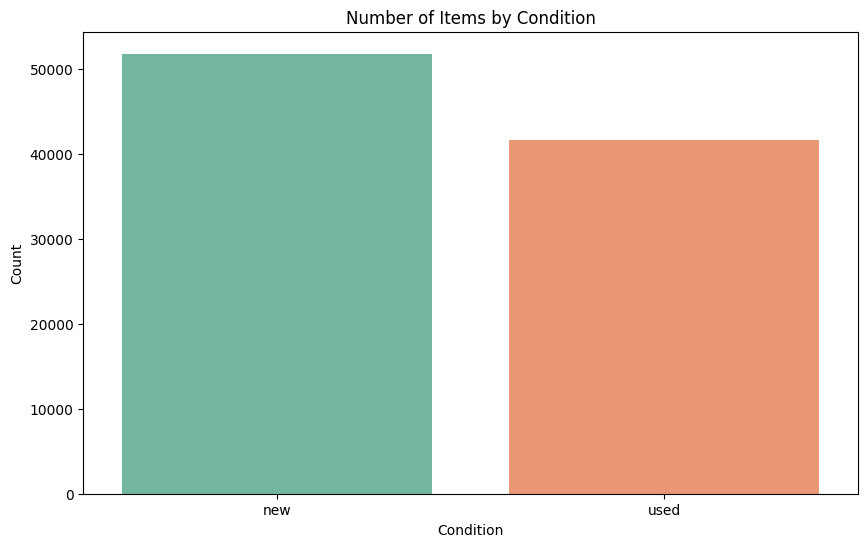

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_data, hue='condition', palette='Set2', x='condition', legend=False)
plt.title('Number of Items by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

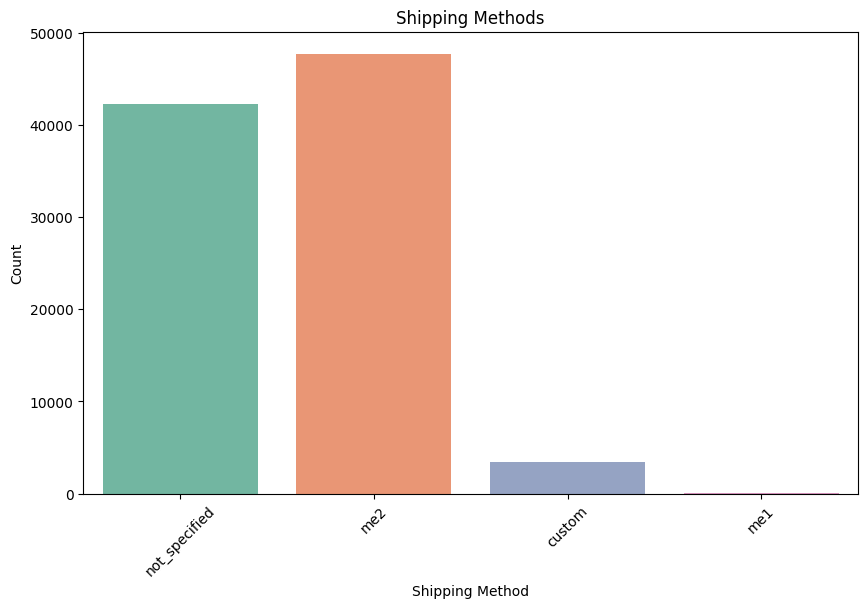

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_data, x='shipping_mode', hue='shipping_mode', palette='Set2', legend=False)
plt.title('Shipping Methods')
plt.xlabel('Shipping Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

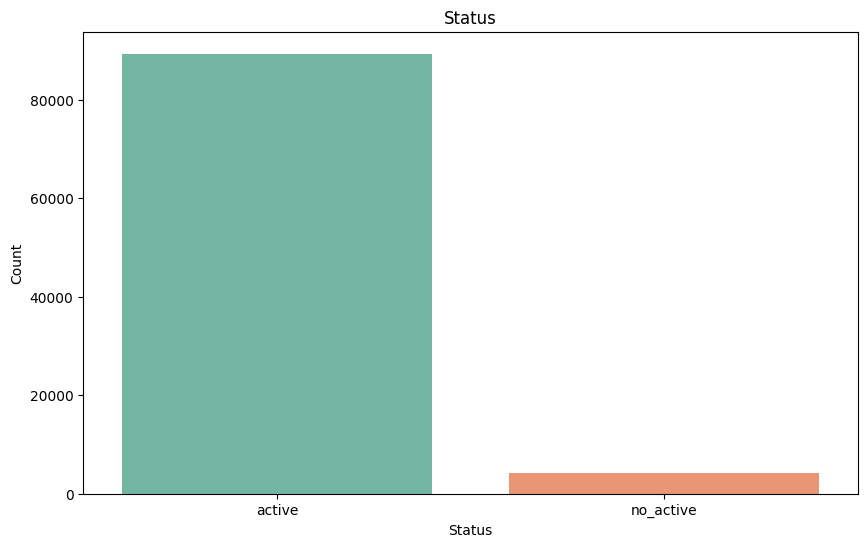

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_data, x='status', hue='status', palette='Set2', legend=False)
plt.title('Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()